In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets as skds
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
X=housing.data.astype(np.float32)
y=housing.target.astype(np.float32)
if (y.ndim == 1):
    y = y.reshape(-1,1)
X = StandardScaler().fit_transform(X)
##Standardize features by removing the mean and scaling to unit variance

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=123)
print(X_train.shape)


(14448, 8)


In [13]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

x_tensor = tf.Variable(tf.zeros([32, num_inputs], dtype=tf.float32), name="x")
y_tensor = tf.Variable(tf.zeros([32, num_outputs], dtype=tf.float32), name="y")
w = tf.Variable(
    tf.zeros([num_inputs, num_outputs]), dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]), dtype=tf.float32, name='b')

model = tf.matmul(x_tensor, w) + b


# Define Loss, MSE and R2


In [16]:
loss = tf.reduce_mean(tf.square(model-y_tensor))#Loss
mse = tf.reduce_mean(tf.square(model-y_tensor))#MSE
y_mean=tf.reduce_mean(y_tensor)
total_error=tf.reduce_sum(tf.square(y_tensor-y_mean))
unexplained_error=tf.reduce_sum(tf.square(y_tensor-model))
rsq = 1 - (unexplained_error / total_error)
print (rsq)

tf.Tensor(nan, shape=(), dtype=float32)


#Define Optimizers

In [17]:
learning_rate=0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

##gradient descent is an algorithm that minimizes functions
## learning rate is the step we take per iteration

#Define Epochs

In [18]:
num_epochs=1800 ##number of iterations to run the training for
##w_hat and b_hat: estimates of w and b
w_hat=0
b_hat=0

loss_epochs=np.empty(shape=[num_epochs],dtype=float)
mse_epochs=np.empty(shape=[num_epochs],dtype=float)
rs_epochs=np.empty(shape=[num_epochs],dtype=float)

# Training Loop

In [19]:
# Training loop
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        model = tf.matmul(X_train, w) + b  # y = W*x + b
        loss = tf.reduce_mean(tf.square(model - y_train))  # MSE

    # Compute gradients
    gradients = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))  # Update weights

    # Store loss for each epoch
    loss_epochs[epoch] = loss.numpy()

    # Calculate metrics for test data
    model_test = tf.matmul(X_test, w) + b
    mse_score = tf.reduce_mean(tf.square(model_test - y_test)).numpy()
    y_mean = tf.reduce_mean(y_test)
    total_error = tf.reduce_sum(tf.square(y_test - y_mean))
    unexplained_error = tf.reduce_sum(tf.square(y_test - model_test))
    rs_score = 1 - (unexplained_error / total_error)

    mse_epochs[epoch] = mse_score
    rs_epochs[epoch] = rs_score

# Final estimates of weights and bias
w_hat = w.numpy()
b_hat = b.numpy()

# Print results
print('For test data : MSE = {0:.8f}, R2 = {1:.8f}'.format(mse_score, rs_score))

For test data : MSE = 0.59683013, R2 = 0.54865521


In [20]:
import numpy as np
import matplotlib.pyplot as plt

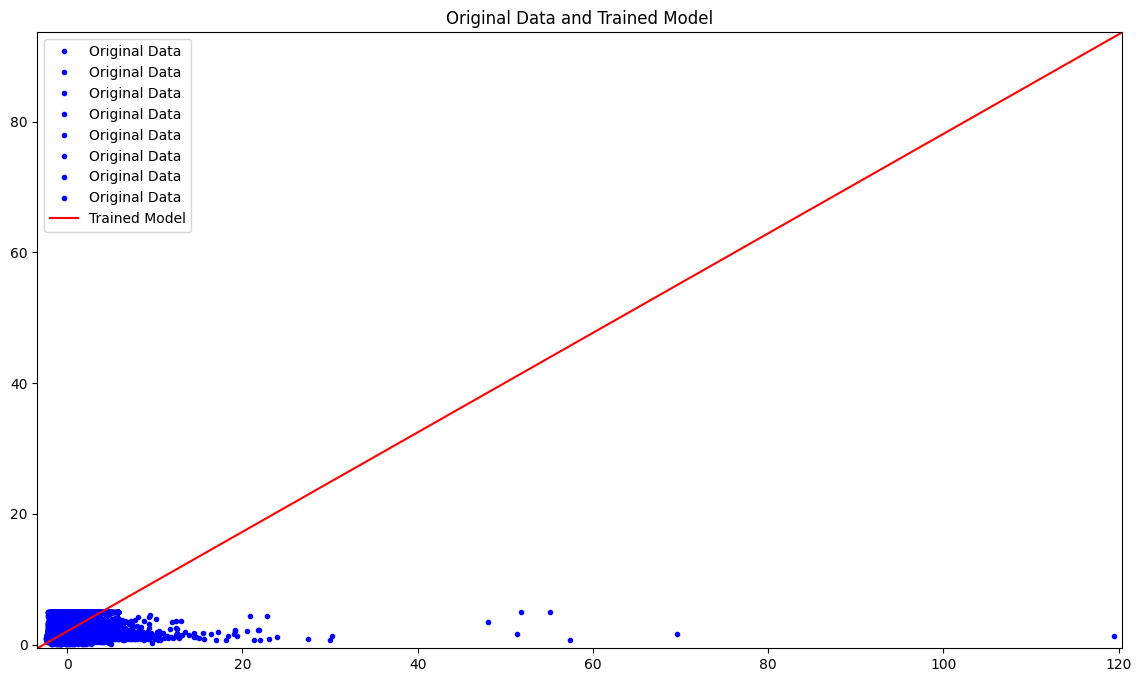

In [21]:
w_hat = w.numpy().flatten()[0]  # Get the first element as a scalar
b_hat = b.numpy()[0]             # Get the first element as a scalar

plt.figure(figsize=(14, 8))
plt.title('Original Data and Trained Model')
x_plot = np.array([np.min(X) - 1, np.max(X) + 1])  # range of X values
y_plot = w_hat * x_plot + b_hat                      # w_hat and b_hat predicted before

# Use min/max of y_plot for the y-axis limits
plt.axis([x_plot[0], x_plot[1], np.min(y_plot), np.max(y_plot)])
plt.plot(X, y, 'b.', label='Original Data')
plt.plot(x_plot, y_plot, 'r-', label='Trained Model')
plt.legend()
plt.show()